In [1]:
import pandas as pd 
df =  pd.read_csv('bitcoin up to 14 aug.csv')

In [2]:
# Ensure that the "Date" column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the DataFrame by the "Date" column
df = df.sort_values(by='Date')

# If you want to reset the index after sorting, you can use:
df = df.reset_index(drop=True)

# Now your DataFrame df is sorted by date
print(df)


           Date          Open          High           Low         Close  \
0    2014-09-17    465.864014    468.174011    452.421997    457.334015   
1    2014-09-18    456.859985    456.859985    413.104004    424.440002   
2    2014-09-19    424.102997    427.834991    384.532013    394.795990   
3    2014-09-20    394.673004    423.295990    389.882996    408.903992   
4    2014-09-21    408.084991    412.425995    393.181000    398.821014   
...         ...           ...           ...           ...           ...   
3615 2024-08-10  60881.230469  61464.511719  60287.566406  60945.812500   
3616 2024-08-11  60944.890625  61778.660156  58348.824219  58719.484375   
3617 2024-08-12  58719.394531  60680.332031  57688.898438  59354.515625   
3618 2024-08-13  59356.207031  61572.398438  58506.253906  60609.566406   
3619 2024-08-14  60603.265625  61679.027344  60487.171875  60972.222656   

         Adj Close       Volume  
0       457.334015     21056800  
1       424.440002     34483200

task 2
we need to check the null values

In [3]:
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3620 entries, 0 to 3619
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3620 non-null   datetime64[ns]
 1   Open       3620 non-null   float64       
 2   High       3620 non-null   float64       
 3   Low        3620 non-null   float64       
 4   Close      3620 non-null   float64       
 5   Adj Close  3620 non-null   float64       
 6   Volume     3620 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 198.1 KB


there are so many rows which are just null so we drop that 


In [4]:
df = df.dropna()
df = df.drop('Date',axis=True)
df.mean()


Open         1.741912e+04
High         1.781639e+04
Low          1.699393e+04
Close        1.743467e+04
Adj Close    1.743467e+04
Volume       1.751004e+10
dtype: float64

now we need to check that is there any column which we need to convert or clean?

the number of row in thw df and numerical_data is same so there is no processing


TASK 3

now we need to analys the correlatiom matrix

In [5]:
correlation  = df.corr()

In [6]:

df

,Open,High,Low,Close,Adj Close,Volume
0,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
3615,60881.230469,61464.511719,60287.566406,60945.812500,60945.812500,15745822278
3616,60944.890625,61778.660156,58348.824219,58719.484375,58719.484375,22759754812
3617,58719.394531,60680.332031,57688.898438,59354.515625,59354.515625,37078637820
3618,59356.207031,61572.398438,58506.253906,60609.566406,60609.566406,30327698167


<Axes: >

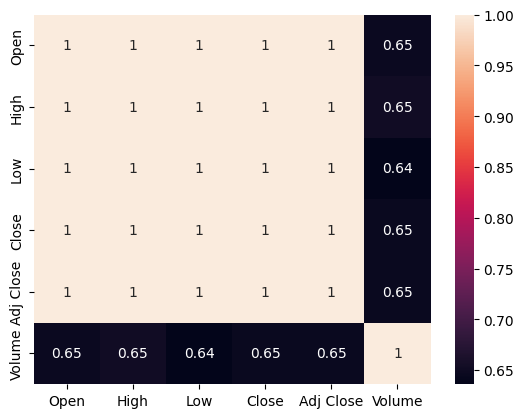

In [7]:
import seaborn as sb
sb.heatmap(correlation,annot=True)

TASK 4

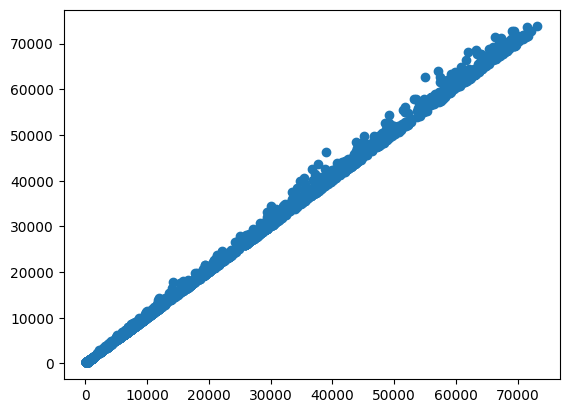

In [8]:
import matplotlib.pyplot as plt 
plt.scatter(df['Open'],df['High'])

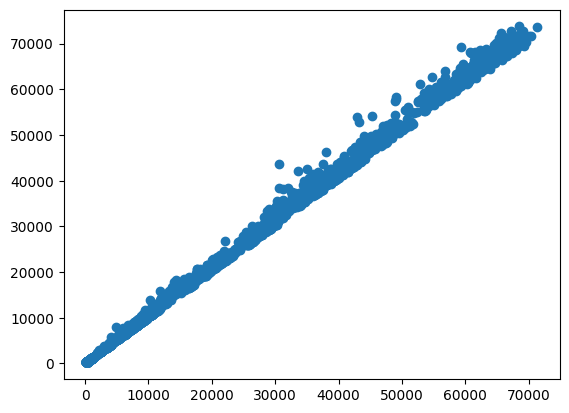

In [9]:
plt.scatter(df['Low'],df['High'])

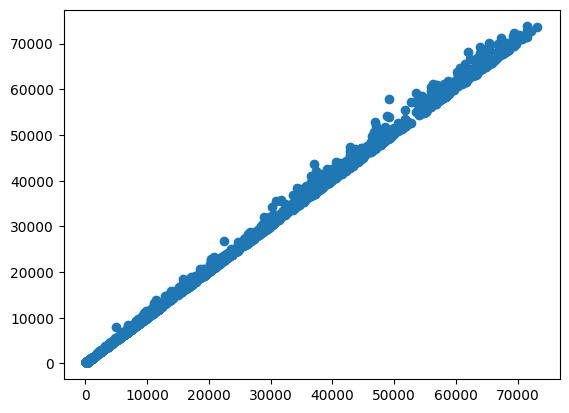

In [10]:
plt.scatter(df['Close'],df['High'])

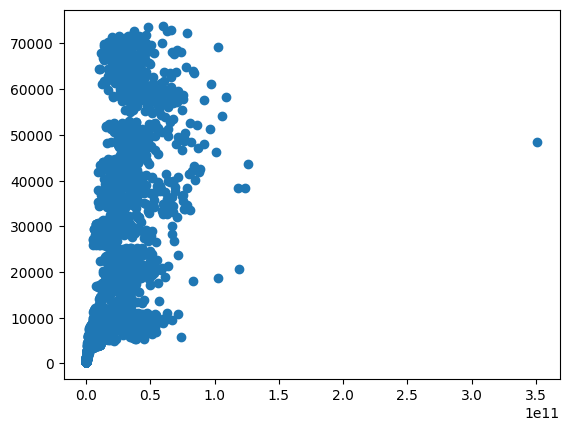

In [11]:
plt.scatter(df['Volume'],df['High'])


the data is linear and we can proceed with our next task

In [12]:
df. mean()

Open         1.741912e+04
High         1.781639e+04
Low          1.699393e+04
Close        1.743467e+04
Adj Close    1.743467e+04
Volume       1.751004e+10
dtype: float64

TAKS 5


In [13]:
df.std()

Open         1.929588e+04
High         1.973042e+04
Low          1.881681e+04
Close        1.930544e+04
Adj Close    1.930544e+04
Volume       1.921570e+10
dtype: float64

In [14]:
X = df.drop("High" ,axis=True)


In [15]:
y = df["High"]

In [16]:
X.mean()
X.shape

(3620, 5)

In [17]:
y.std()
y=pd.DataFrame(y)
y

,High
0,468.174011
1,456.859985
2,427.834991
3,423.295990
4,412.425995
...,...
3615,61464.511719
3616,61778.660156
3617,60680.332031
3618,61572.398438


In [22]:
X['Open'] =( X['Open']-1.741912e+04)/1.929588e+04
X['Low'] =( X['Low']-1.699393e+04)/1.881681e+04
X['Close'] =( X['Close']-1.743467e+04)/1.930544e+04
X['Adj Close'] =( X['Adj Close']-1.743467e+04)/1.930544e+04
X['Volume'] =( X['Volume']-1.751004e+10)/1.921570e+10
y=(y-18122.713103544873)/19699.9931422238
X.shape

(3620, 5)

In [23]:
import numpy as np
x= np.array(X)

y = np.array(y)
x.mean()
y.shape

(3620, 1)

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [25]:
y_train = y_train[1:]
x_train = x_train[:-1]
x_test = x_test[:-1]
y_test = y_test[1:]

In [26]:
from sklearn.neighbors import KNeighborsRegressor 
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [22]:
class CustomLinearRegression:
    def __init__(self):
        self.w = []
        self.y_train = None
        self.y_train = None
        self.b=0
    def populatedata(self,x_train,y_train):
        self.y_train = y_train
        self.X_train = x_train
    def predict(self,ws,b,xt):
            y = [np.sum([w*x for w,x in zip(ws,row)])+b for row in xt]
            
        
            return y
    def compute_cost(self,x, y, w, b): 
   
        m,_ = x.shape
        cost = 0.0
        for i in range(m):                                
            f_wb_i = np.dot(x[i], w) + b       
            cost = cost + (f_wb_i - y[i])**2       
        cost = cost /m                          
        return cost
    def gradient_function(self,w,b,x,y):
        m,n = x.shape
        
        sumw = np.zeros(n)
        sumb = 0

        p=self.predict(w,b,x)
        p = list(p)
        y = list(y)

        error =[p-a for p,a in zip(p,y)] 

        
        print(sum(error))
        error = np.array(error).reshape(-1, 1)
        sumw = np.sum(error * x, axis=0)
        # sumw = np.dot(error,x )   
        
        sumb = sum(error)
        dw = sumw/m
        db = sumb/m
        
        return dw,db 
    def compute_gradient_decent(self,x,y,w,b,iterations,alfa):
        import copy
        w_in = copy.deepcopy(w)  #avoid modifying global w within function
        b_in = b

        for i in range(iterations):
            
            dw,db = self.gradient_function(w_in,b_in,x,y)
            w_in=w_in-(alfa*dw)
            b_in=b_in-(alfa*db)
            p=self.predict(w_in,b_in,x)          
        return w_in,b_in
    

    def fit(self,x_train,y_train):
        _,m = x_train.shape
        initial_w = np.zeros(m)
        initial_b =  0
        self.populatedata(x_train,y_train)
        iterations = 1000
        alpha = 0.01



        self.w, self.b = self.compute_gradient_decent(self.X_train, self.y_train, initial_w, initial_b,iterations,alpha)
    


In [23]:
obj = CustomLinearRegression()
obj.fit(x_train,y_train)


[-0.56172313]
[-0.53479888]
[-0.50918712]
[-0.48482775]
[-0.46166338]
[-0.43963916]
[-0.41870274]
[-0.3988041]
[-0.37989545]
[-0.36193119]
[-0.34486772]
[-0.32866343]
[-0.31327857]
[-0.29867518]
[-0.284817]
[-0.27166942]
[-0.25919936]
[-0.24737526]
[-0.23616696]
[-0.22554567]
[-0.21548388]
[-0.20595536]
[-0.19693502]
[-0.18839893]
[-0.18032424]
[-0.17268911]
[-0.16547272]
[-0.15865517]
[-0.15221746]
[-0.14614146]
[-0.14040987]
[-0.13500616]
[-0.12991455]
[-0.12511999]
[-0.1206081]
[-0.11636516]
[-0.11237807]
[-0.10863434]
[-0.10512203]
[-0.10182977]
[-0.09874669]
[-0.09586242]
[-0.09316707]
[-0.09065119]
[-0.08830579]
[-0.08612226]
[-0.08409241]
[-0.08220842]
[-0.08046282]
[-0.07884851]
[-0.07735868]
[-0.07598687]
[-0.07472691]
[-0.07357289]
[-0.07251922]
[-0.07156053]
[-0.07069172]
[-0.06990793]
[-0.06920452]
[-0.06857706]
[-0.06802134]
[-0.06753335]
[-0.06710926]
[-0.06674542]
[-0.06643836]
[-0.06618477]
[-0.0659815]
[-0.06582555]
[-0.06571405]
[-0.06564429]
[-0.06561368]
[-0.0656197

In [24]:
print(obj.w)
# del(obj)

[ 0.00287792  0.00939178  0.00958233  0.00958233 -0.02544427]


In [25]:
print(obj.w)

[ 0.00287792  0.00939178  0.00958233  0.00958233 -0.02544427]


In [26]:
print(obj.b)

[0.0001797]


In [27]:
yp= obj.predict(obj.w,obj.b,x_test)

In [28]:
y_test

array([[ 0.13864633],
       [-0.69375724],
       [-0.733126  ],
       ...,
       [ 0.52843252],
       [ 0.19058004],
       [ 1.51680304]])

In [25]:
yp

[array([0.00503541]),
 array([-0.03738673]),
 array([-0.00017432]),
 array([-0.00625353]),
 array([-0.0107423]),
 array([0.02762448]),
 array([-0.00461839]),
 array([-0.00394007]),
 array([-0.00439195]),
 array([0.02883658]),
 array([0.00087136]),
 array([-0.02239964]),
 array([0.02839176]),
 array([-0.00263684]),
 array([0.00110559]),
 array([-0.00374694]),
 array([8.00835196e-05]),
 array([0.00044566]),
 array([0.00203001]),
 array([-0.00078026]),
 array([-0.01097227]),
 array([-0.00464138]),
 array([0.00905084]),
 array([-0.00294382]),
 array([-0.00122194]),
 array([-0.04783195]),
 array([-0.00457139]),
 array([-0.00655577]),
 array([-0.00392545]),
 array([0.00052831]),
 array([-0.00435885]),
 array([-0.00465835]),
 array([-0.00470141]),
 array([0.02152105]),
 array([-0.00480735]),
 array([0.048581]),
 array([-0.00592268]),
 array([-0.00444065]),
 array([-0.01989263]),
 array([-0.00014263]),
 array([-0.00459844]),
 array([-0.00462817]),
 array([-0.00601685]),
 array([-0.00039353]),


In [26]:
yp=(yp[:100])
yt =list(y_test)
yt = yt[:100]

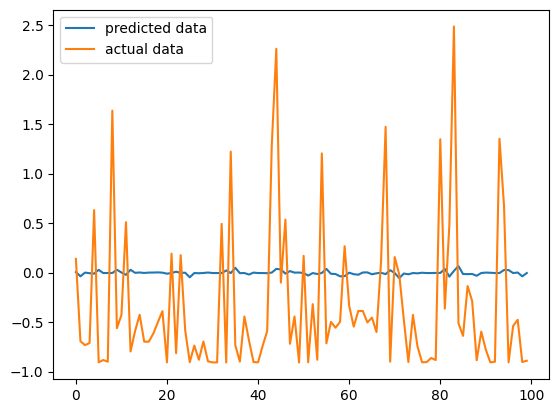

In [27]:
import matplotlib.pyplot as plt
# print(y_test)
plt.plot(yp ,label = "predicted data")
plt.plot(yt, label = 'actual data')
plt.legend()
plt.show()

In [18]:
def predict(ws,b,xt):
    y = [np.sum([w*x for w,x in zip(ws,row)])+b for row in xt]
    
    return y

In [19]:
def gradient_function(w,b,x,y):
    m,n = x.shape
    
    sumw = np.zeros(n)
    sumb = 0

    p=predict(w,b,x)
    p = list(p)
    y = list(y)

    error =[p-a for p,a in zip(p,y)] 

    
    print(sum(error))

    sumw=np.dot(error,x)   
    
    sumb = sum(error)
    dw = sumw/m
    db = sumb/m
    
    return dw,db 

In [20]:
def compute_cost(x, y, w, b): 
   
    m,_ = x.shape
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(x[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost /m                      #scalar    
    return cost

In [21]:
def compute_gradient_decent(x,y,w,b,iterations,alfa):
    import copy
    w_in = copy.deepcopy(w)  #avoid modifying global w within function
    b_in = b

    for i in range(iterations):
        
        dw,db = gradient_function(w_in,b_in,x,y)
        w_in=w_in-(alfa*dw)
        b_in=b_in-(alfa*db)
        p=predict(w_in,b_in,x)          
    return w_in,b_in

In [22]:
x_train

array([[-0.5413897 , -0.53543382, -0.53863205, -0.53863205, -0.67737247],
       [-0.86720222, -0.86688526, -0.86749312, -0.86749312, -0.9071385 ],
       [ 0.81352244,  0.81801465,  0.83420706,  0.83420706,  2.28440471],
       ...,
       [-0.8556605 , -0.8558232 , -0.85697463, -0.85697463, -0.90556647],
       [ 2.53921434,  2.47663529,  2.42671035,  2.42671035,  0.6644767 ],
       [ 0.48209   ,  0.51169901,  0.48872179,  0.48872179, -0.50059854]])

In [23]:







# print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

# m,_ = x_train.shape
# m,_ = x_test.shape
# for i in range(m):
#     print(f"prediction: {np.dot(x_test[i], w_final) + b_final:0.2f}, target value: {y_test[i]}")


-45922955.40296886
-40957810.627355956
-36656614.60669478
-32878340.08198537
-29529291.504756864
-26543579.939075105
-23872134.894477002
-21476468.452426765
-19325090.171417516
-17391405.32016479
-15652447.409110695
-14088083.770244393
-12680492.727321105
-11413799.663179617
-10273808.634519182
-9247793.645651003
-8324329.00380185
-7493146.740545591
-6745013.89446466
-6071625.173122669
-5465508.071724179
-4919938.434601448
-4428864.9891169965
-3986841.718402263
-3588967.1580078662
-3230829.8514509173
-2908459.3085522284
-2618281.8940400067
-2357081.1411156706
-2121962.04073166
-1910318.9053153493
-1719806.4474932344
-1548313.751248121
-1393940.8457140184
-1254977.6210746935
-1129884.8522381815
-1017277.1194746447
-915907.4363286899
-824653.4141076931
-742504.8093268821
-668552.3158572953
-601977.4773481468
-542043.6079362648
-488087.62045155553
-439512.67140398343
-395781.54110615974
-356410.67544762354
-320964.82318276964
-289052.20920602034
-260320.19023808392
-234451.34470317533
-21

In [32]:
print(w_final,b_final)

[8334.96313297  809.28019372 5222.98009219 5222.98009219  212.4988747 ] 17813.911610743868


In [19]:
# print(w_final,b_final)
# w_final=[ 4.49861594e-03 , 4.49954629e-03 ,-4.91822250e-06  ,1.25927175e-05] 
# b_final =0.006013192981667382

In [33]:
yp = predict(w_final,0.006013192981667382,x_train)
# yp=list(yp)
yp=(yp[:100])
yt =list(y_train)
yt = yt[:100]

In [34]:
yt

[np.float64(7057.169922),
 np.float64(690.44397),
 np.float64(34638.214844),
 np.float64(29675.732422),
 np.float64(22314.941406),
 np.float64(395.502014),
 np.float64(11273.799805),
 np.float64(366.756989),
 np.float64(230.285004),
 np.float64(55329.257813),
 np.float64(245.828003),
 np.float64(62572.175781),
 np.float64(6793.836426),
 np.float64(7437.640137),
 np.float64(318.170013),
 np.float64(23479.347656),
 np.float64(4210.049805),
 np.float64(942.723999),
 np.float64(3608.84082),
 np.float64(6480.589844),
 np.float64(21564.501953),
 np.float64(37444.570313),
 np.float64(26840.498047),
 np.float64(9272.759766),
 np.float64(3476.223877),
 np.float64(7574.195801),
 np.float64(8054.660156),
 np.float64(57349.234375),
 np.float64(1217.569946),
 np.float64(255.257996),
 np.float64(7166.549805),
 np.float64(8274.120117),
 np.float64(742.213989),
 np.float64(10414.775391),
 np.float64(6713.560059),
 np.float64(6794.330078),
 np.float64(236.453995),
 np.float64(29439.121094),
 np.float64

In [35]:
yp

[np.float64(-10716.243050722433),
 np.float64(-17184.21012086088),
 np.float64(16642.21574520575),
 np.float64(12237.39745182036),
 np.float64(4688.972816607343),
 np.float64(-17491.479962332472),
 np.float64(-6714.5151776439925),
 np.float64(-17536.993237067087),
 np.float64(-17651.591339095812),
 np.float64(37640.43462486032),
 np.float64(-17636.058156302406),
 np.float64(44864.68452525207),
 np.float64(-10820.195161411515),
 np.float64(-10339.83367368336),
 np.float64(-17569.96141096282),
 np.float64(5602.901669893531),
 np.float64(-13744.156858868813),
 np.float64(-16959.603830113843),
 np.float64(-14185.924729320745),
 np.float64(-11341.807371159244),
 np.float64(3668.387342403931),
 np.float64(19779.956366804192),
 np.float64(9233.393821125665),
 np.float64(-8470.712971574549),
 np.float64(-14308.058428360786),
 np.float64(-9884.161535893465),
 np.float64(-9928.07785957995),
 np.float64(40159.97129210772),
 np.float64(-16659.196921961367),
 np.float64(-17626.888738901085),
 np.fl

In [36]:
yp = np.array(yp)
yt = np.array(yt)
yp = np.dot(yp,1000)
yt = np.dot(yt,1000)

print(yp)


[-10716243.05072243 -17184210.12086088  16642215.74520575
  12237397.45182036   4688972.81660734 -17491479.96233247
  -6714515.17764399 -17536993.23706709 -17651591.33909581
  37640434.62486032 -17636058.15630241  44864684.52525207
 -10820195.16141151 -10339833.67368336 -17569961.41096282
   5602901.66989353 -13744156.85886881 -16959603.83011384
 -14185924.72932074 -11341807.37115924   3668387.34240393
  19779956.36680419   9233393.82112566  -8470712.97157455
 -14308058.42836079  -9884161.53589346  -9928077.85957995
  40159971.29210772 -16659196.92196137 -17626888.73890109
 -10731803.54963719  -9517272.21599284 -17134678.60876859
  -7124934.97158936 -11089941.9495598  -11074493.50888987
 -17648376.72056853  11996726.14988695 -12568832.46227857
  13946597.38556531  28036200.47021609  21841129.0023283
  -9052976.69483411 -11092190.91585317  45391018.99439569
  13004184.07954167 -11063984.97790949 -17568272.01330241
  19938677.84095712 -13684708.09467252 -11790869.66528349
  26787630.7772

In [26]:
print(yt)

[5.056491e+05 6.450500e+03 7.010500e+03 2.262200e+03 1.000843e+05
 1.038862e+05 9.888950e+04 6.421170e+04 6.859700e+04 2.555000e+03
 7.637800e+03 5.228400e+04 6.335150e+04 6.354650e+04 4.479300e+03
 4.709900e+03 1.098000e+02 1.087445e+05 1.322332e+05 6.733690e+04
 9.375800e+04 5.741400e+03 7.788580e+04 1.159478e+05 8.893980e+04
 2.500000e+03 8.120280e+04 2.371800e+03 7.033770e+04 7.330000e+04
 4.090100e+03 4.920300e+03 4.878400e+03 6.900000e+04 7.257710e+04
 7.373000e+03 3.148800e+03 1.126900e+04 8.873640e+04 3.902180e+04
 7.593500e+04 7.184980e+04 8.933230e+04 1.885000e+05 4.646300e+03
 4.201560e+04 7.775000e+03 9.245300e+04 5.721200e+03 4.394400e+03
 3.245100e+03 1.279500e+03 1.022098e+05 6.297400e+03 9.416990e+04
 6.618800e+03 9.925900e+03 8.819220e+04 4.616900e+03 3.224990e+04
 6.906000e+03 8.098990e+04 8.535530e+04 7.016370e+04 7.304940e+04
 3.763910e+04 3.540400e+03 7.285380e+04 7.506200e+04 6.708670e+04
 7.369900e+03 6.691060e+04 1.037798e+05 1.455766e+05 9.600200e+04
 1.174281e

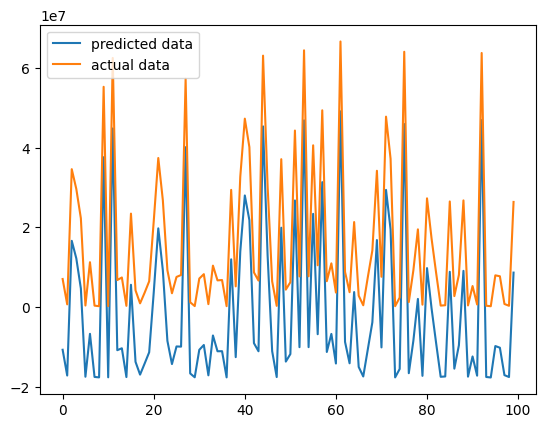

In [37]:
import matplotlib.pyplot as plt
# print(y_test)
plt.plot(yp ,label = "predicted data")
plt.plot(yt, label = 'actual data')
plt.legend()
plt.show()

In [29]:
predictions = predict(w_final,b_final,x_test)

In [30]:
predictions

[np.float64(-6.268410312256639e-06),
 np.float64(0.014245399159595114),
 np.float64(0.00985399481847495),
 np.float64(0.0007974056324017769),
 np.float64(0.0024780067469640107),
 np.float64(0.0003861852962576051),
 np.float64(0.007211872704149271),
 np.float64(0.0003731417073959955),
 np.float64(0.011670819941975486),
 np.float64(0.007085134211493061),
 np.float64(0.008376175928661859),
 np.float64(1.2637196093068237e-05),
 np.float64(0.002657050365284458),
 np.float64(0.0006072506100414056),
 np.float64(0.005721576137833745),
 np.float64(0.0004575804405589313),
 np.float64(0.01006122694736514),
 np.float64(0.002434816967036186),
 np.float64(0.003984595991988161),
 np.float64(0.00020329468122121108),
 np.float64(0.000654455330481943),
 np.float64(0.0005917856354141823),
 np.float64(0.031593144530300696),
 np.float64(9.904672946819178e-05),
 np.float64(0.0007000991746001321),
 np.float64(0.03384681951538465),
 np.float64(0.0005156267001353515),
 np.float64(0.00473874624323819),
 np.floa

In [31]:
predictions=predictions[:100]
test =list(y_test)
test = test[:100]

In [35]:
print(predictions)

[-6.26841031e-02  1.42453992e+02  9.85399482e+01  7.97405632e+00
  2.47800675e+01  3.86185296e+00  7.21187270e+01  3.73141707e+00
  1.16708199e+02  7.08513421e+01  8.37617593e+01  1.26371961e-01
  2.65705037e+01  6.07250610e+00  5.72157614e+01  4.57580441e+00
  1.00612269e+02  2.43481697e+01  3.98459599e+01  2.03294681e+00
  6.54455330e+00  5.91785635e+00  3.15931445e+02  9.90467295e-01
  7.00099175e+00  3.38468195e+02  5.15626700e+00  4.73874624e+01
  1.12906867e+00  6.33535433e+00  7.13874733e+01  6.53964183e+00
  9.33491782e+01  9.22383545e+00  1.30425509e+02  3.85437461e+02
  2.32535602e+00  1.08448710e+01  1.46596897e+02  2.62026638e+00
  6.84859194e+01  9.08588531e+01  4.17617923e+01  6.56254574e+00
  6.43421035e+00  1.03616392e+02  5.66347132e+02  2.75634806e+00
  3.66699071e+00  9.29163375e+01  1.16931366e+01  4.64124835e+00
  3.99994705e+00  3.84450743e+00  8.39036005e+01  1.09249133e+02
  5.96024044e+00  9.55280261e+01  7.33011213e+01  3.90696612e+00
  3.97816079e+01  7.56880

In [33]:
print(test)

[np.float64(0.00626), np.float64(14.25544), np.float64(9.850629999999999), np.float64(0.799), np.float64(2.47597), np.float64(0.38525), np.float64(7.20724), np.float64(0.37257), np.float64(11.67112), np.float64(7.08847), np.float64(8.38056), np.float64(0.01209), np.float64(2.65997), np.float64(0.60678), np.float64(5.7024300000000006), np.float64(0.4566), np.float64(10.06409), np.float64(2.43298), np.float64(3.98129), np.float64(0.20488), np.float64(0.6547000000000001), np.float64(0.59099), np.float64(31.58441), np.float64(0.09831999999999999), np.float64(0.69898), np.float64(33.82869), np.float64(0.51466), np.float64(4.740060000000001), np.float64(0.11254), np.float64(0.63246), np.float64(7.135), np.float64(0.6534800000000001), np.float64(9.33498), np.float64(0.92152), np.float64(13.041129999999999), np.float64(38.53167), np.float64(0.23681), np.float64(1.0844500000000001), np.float64(14.65126), np.float64(0.26419), np.float64(6.85298), np.float64(9.07974), np.float64(4.17459), np.floa

In [37]:
predictions = np.array(predictions)
test= np.array(test)
predictions= np.dot(predictions,1000)
test = np.dot(test,1000)

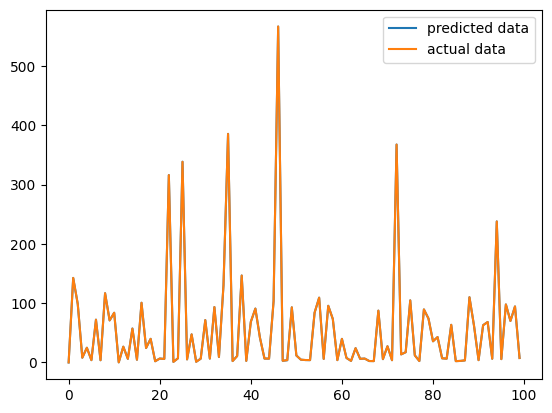

In [38]:

# print(y_test)
plt.plot(predictions ,label = "predicted data")
plt.plot(test, label = 'actual data')
plt.legend()
plt.show()

In [ ]:
compute_cost(x_test,y_test,w_final,b_final)

np.float64(1.370972675023821e-10)

In [26]:
obj = CustomLinearRegression()
print(obj.X_test)
obj.populatedata()

print(obj.X_test)



None
[5, 6, 7, 8]


In [60]:
del obj